In [1]:
import sys
import importlib
try:
    importlib.reload(sys.modules['experiments'])
except:
    pass
from experiments import *


In [2]:
universe = prepare_universe()

In [3]:
highbm = universe[universe.bm_quintile==4]


In [4]:
bulls, bears = classify_bulls_and_bears()
bulls

,min,max
bearn,,
0,1980-01-02,1980-11-28
1,1982-08-12,1987-08-25
2,1987-12-04,2000-03-24
3,2002-10-09,2007-10-09
4,2009-03-09,2020-02-19
5,2020-03-23,2022-01-03
6,2022-10-12,2023-12-15


In [5]:
bears

,min,max
bearn,,
1,1980-12-01,1982-08-11
2,1987-08-26,1987-12-03
3,2000-03-27,2002-10-08
4,2007-10-10,2009-03-06
5,2020-02-20,2020-03-20
6,2022-01-04,2022-10-11


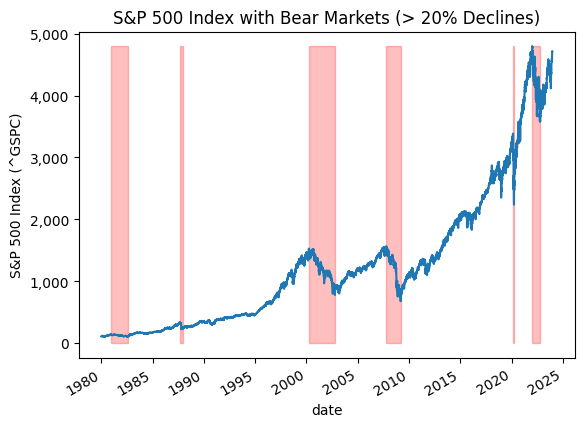

In [6]:
df = get_hist(MARKET_TICKER)[['adjClose']]
df.adjClose.plot()
import matplotlib.pyplot as plt
for i, row in bears.iterrows():
  plt.fill_between(row, df.adjClose.max(), alpha=0.25, color='r')
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
plt.ylabel('S&P 500 Index (^GSPC)')
plt.title('S&P 500 Index with Bear Markets (> 20% Declines)')

#plt.savefig('bears.png')
plt.show()

In [7]:
res = bull_bear(highbm.query('date == 2022 and symbol != "CHRD" and symbol != "GGR" '))

2022-01-04 2022-10-11 filter= p0 pfolio_size 10 pool size 71
2022-01-04 2022-10-11 filter= p1 pfolio_size 10 pool size 262
2022-01-04 2022-10-11 filter= p2 pfolio_size 10 pool size 193
2022-01-04 2022-10-11 filter= p3 pfolio_size 10 pool size 249
2022-01-04 2022-10-11 filter= p4 pfolio_size 10 pool size 234


KeyboardInterrupt: 

In [ ]:
res.head()

In [ ]:
# reshape so returns are in separate rows for seaborn
res2 = pd.melt(res, id_vars=['start', 'end', 'market', 'group'], value_vars=['raw_ret', 'ma_ret'], var_name='return type')
res2.head()

In [ ]:
import seaborn as sns
sns.set_theme(style="darkgrid")
sns.displot(
    res2, x="value", hue='market', col="return type", row='group',
    facet_kws=dict(margin_titles=True),
)


In [8]:
def p5(g):
    return np.percentile(g, 5)
def p25(g):
    return np.percentile(g, 25)

def p75(g):
    return np.percentile(g, 75)

def p10(g):
    return np.percentile(g, 10)

def p90(g):
    return np.percentile(g, 90)

def ES(g):
    p = np.percentile(g, 5)
    return g[g <= p].mean()

def MS(g):
    p = np.percentile(g, 5)
    return g[g <= p].median()
func_lst = [np.mean, p25, np.median, p75, np.std]
pd.pivot_table(res, values=['raw_ret', 'ma_ret'], index=['group', 'market'], aggfunc=func_lst, margins=True)

NameError: name 'res' is not defined

In [9]:
highbm.columns

Index(['date', 'totalAssets', 'mve', 'commonStockIssued', 'roa',
       'operatingCashFlow', 'book', 'price', 'bm', 'd_roa', 'd_lever',
       'd_liquid', 'd_margin', 'd_turn', 'i_roa', 'cf', 'i_cf', 'id_roa',
       'i_accrual', 'id_lever', 'id_liquid', 'eq_offer', 'id_margin',
       'id_turn', 'pscore', 'symbol', 'bm_quintile', 'mve_quintile',
       'pscore_group', 'accrual'],
      dtype='object')

In [10]:
highbm = highbm.query('symbol != "CHRD" and symbol != "GGR" and symbol != "ASPAW"')

years = highbm.date.unique()
years.sort()
market_types = [bears, bulls]
market_type_names = ['bear', 'bull']
results = {}
rows = []
for year in years:
    basket = highbm[highbm.date==year].copy()
    for i, market_type in enumerate(market_types):
        # find bull/bear markets starting within the year
        #print('her', year, typenames[i])
        market_type_for_year = market_type[pd.DatetimeIndex(market_type['min']).year == year]
        for _, row in market_type_for_year.iterrows():
            #print(market_type_for_year)
            #asdf
            start = row["min"].strftime('%Y-%m-%d')
            end = row["max"].strftime('%Y-%m-%d')
            basket['start'] = start
            basket['end'] = end
            basket['market'] = market_type_names[i]
            basket[return_vector_field_names] = (basket.apply(lambda x: computeReturns(x, start, end), axis=1, result_type='expand'))
            rows.extend(basket.values.tolist())
res = pd.DataFrame(columns=['date', 'totalAssets', 'mve', 'commonStockIssued', 'roa',
       'operatingCashFlow', 'book', 'price', 'bm', 'd_roa', 'd_lever',
       'd_liquid', 'd_margin', 'd_turn', 'i_roa', 'cf', 'i_cf', 'id_roa',
       'i_accrual', 'id_lever', 'id_liquid', 'eq_offer', 'id_margin',
       'id_turn', 'pscore', 'symbol', 'bm_quintile', 'mve_quintile',
       'pscore_group', 'accrual', 'start', 'end', 'market', *return_vector_field_names], data=rows).dropna()
res.head()

,date,totalAssets,mve,commonStockIssued,roa,operatingCashFlow,book,price,bm,d_roa,d_lever,d_liquid,d_margin,d_turn,i_roa,cf,i_cf,id_roa,i_accrual,id_lever,id_liquid,eq_offer,id_margin,id_turn,pscore,symbol,bm_quintile,mve_quintile,pscore_group,accrual,start,end,market,raw_ret,raw_ret_pos,raw_avg_ret,raw_avg_ret_pos,p0,p10,p25,p50,p75,p90,max,ma_ret,ma_ret_pos,ma_avg_ret,ma_avg_ret_pos,m_ret
0,1987,2.49e+09,4.15e+08,0.0,0.01,9.39e+07,14.04,3.52,3.99,-3.98e-02,0.04,-5.37e-01,0.0,-0.30,1.0,0.04,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,4.0,AFG,4.0,2:high,2-7:med,2.43e-02,1987-08-26,1987-12-03,bear,-0.19,0.0,-0.13,0.0,-0.29,-0.25,-0.21,-0.08,-0.05,-0.02,0.00,0.11,1.0,0.02,1.0,-0.3
1,1987,1.28e+08,7.11e+06,0.0,0.10,1.23e+07,10.32,0.62,16.72,0.00e+00,0.00,0.00e+00,0.0,0.00,1.0,0.10,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,EMF,4.0,0:low,2-7:med,2.35e-04,1987-08-26,1987-12-03,bear,-0.44,0.0,-0.19,0.0,-0.49,-0.42,-0.39,-0.12,-0.01,0.01,0.03,-0.14,0.0,-0.04,0.0,-0.3
2,1987,2.44e+08,1.95e+07,0.0,0.04,1.47e+07,15.68,1.86,8.43,2.11e-03,-0.03,4.48e-03,0.0,0.02,1.0,0.06,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,6.0,PSA,4.0,0:low,2-7:med,1.73e-02,1987-08-26,1987-12-03,bear,-0.20,0.0,-0.12,0.0,-0.27,-0.22,-0.19,-0.11,-0.06,0.00,0.02,0.10,1.0,0.04,1.0,-0.3
3,1987,1.82e+08,3.12e+07,0.0,0.06,1.08e+07,9.53,2.58,3.69,0.00e+00,0.00,0.00e+00,0.0,0.00,1.0,0.06,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,STC,4.0,0:low,2-7:med,-4.93e-03,1987-08-26,1987-12-03,bear,-0.34,0.0,-0.19,0.0,-0.41,-0.36,-0.34,-0.15,-0.05,0.00,0.01,-0.04,0.0,-0.03,0.0,-0.3
4,1987,8.76e+08,2.04e+07,0.0,0.02,0.00e+00,5.69,1.00,5.69,0.00e+00,0.00,0.00e+00,0.0,0.00,1.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,WEN,4.0,0:low,0-1:lo,-1.75e-02,1987-08-26,1987-12-03,bear,-0.04,0.0,-0.06,0.0,-0.28,-0.22,-0.07,-0.02,0.00,0.01,0.01,0.27,1.0,0.10,1.0,-0.3


In [12]:
# reshape so returns are in separate rows for seaborn
print(len(res))
res2 = pd.melt(res, id_vars=['start', 'end', 'market', 'pscore', 'symbol', 'mve_quintile', 'pscore_group'], value_vars=['raw_ret', 'ma_ret', 'm_ret'], var_name='return_type')
len(res2)

6672


20016

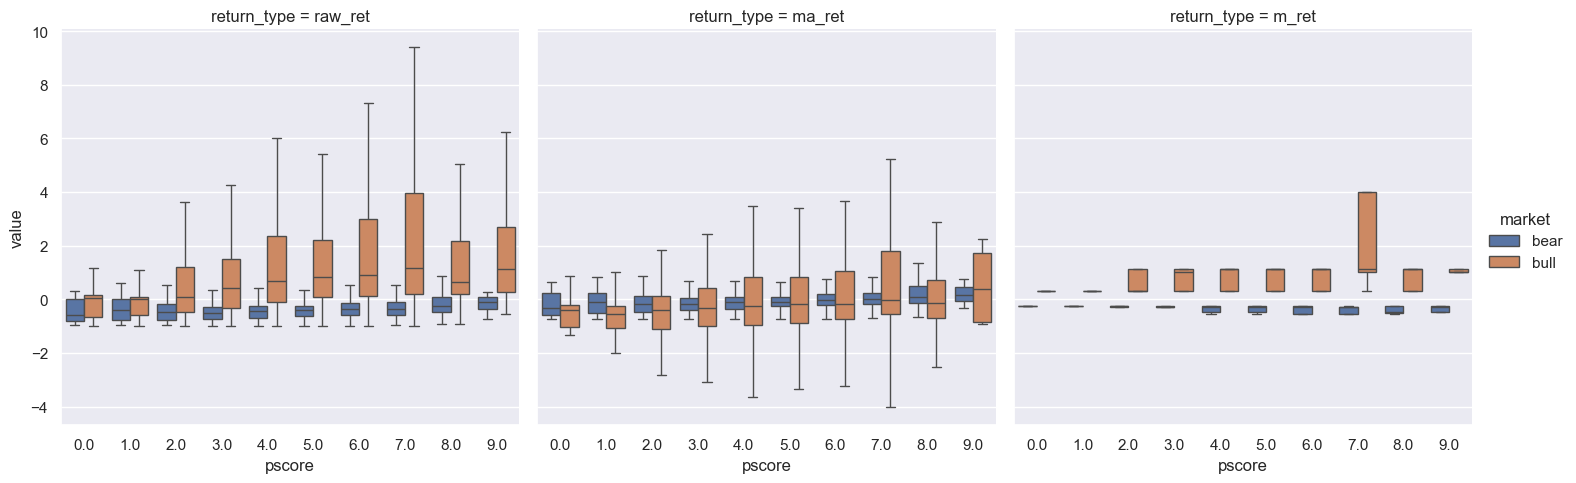

In [13]:
import seaborn as sns
sns.set_theme(style="darkgrid")
import matplotlib.pyplot as plt
# outlier removal for plotting
#res3 = res2[np.abs(stats.zscore(res2.value)) < 2]
sns.set(rc={'figure.figsize':(8.27, 5)})

p = sns.catplot(
    res2, y="value", hue='market', x='pscore',kind="box",
    showfliers = False,
    col='return_type'
)
plt.show()


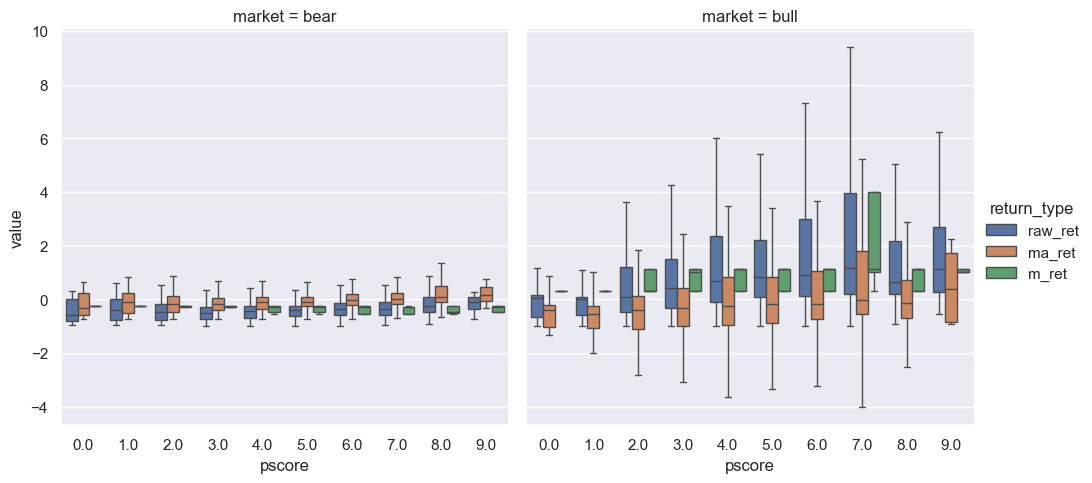

In [14]:
import seaborn as sns
sns.set_theme(style="darkgrid")
import matplotlib.pyplot as plt
# outlier removal for plotting
#res3 = res2[np.abs(stats.zscore(res2.value)) < 2]
sns.set(rc={'figure.figsize':(8.27, 5)})

p = sns.catplot(
    res2, y="value", hue='return_type', x='pscore',kind="box",
    showfliers = False,
    col='market'
)
plt.show()

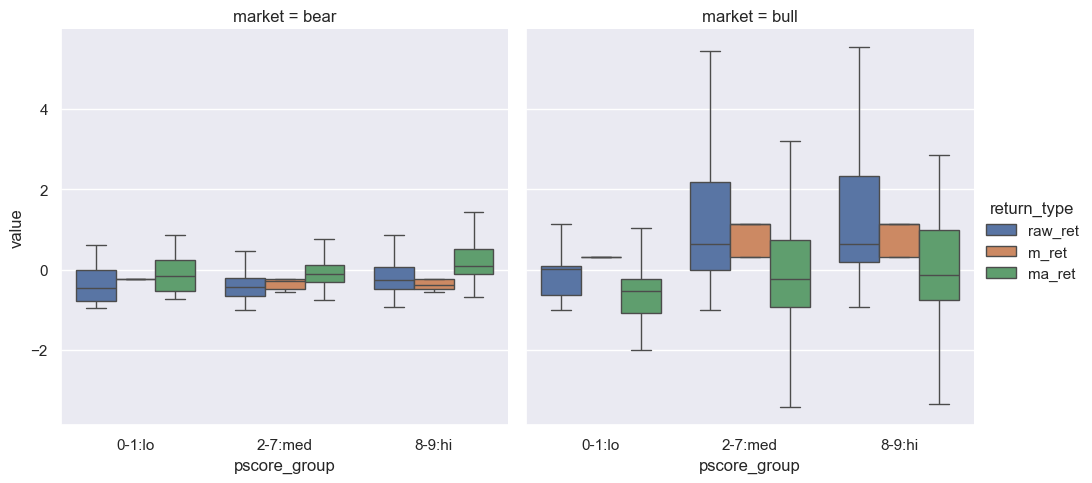

In [16]:
import seaborn as sns
sns.set_theme(style="darkgrid")
import matplotlib.pyplot as plt
# outlier removal for plotting
#res3 = res2[np.abs(stats.zscore(res2.value)) < 2]
sns.set(rc={'figure.figsize':(8.27, 5)})

p = sns.catplot(
    res2.sort_values(by=['pscore_group']), y="value", hue='return_type', x='pscore_group',kind="box",
    log_scale=False,
    showfliers = False,
col='market'
)
plt.show()

# OBSERVATIONS
# DURING BULL MARKET, THE MEDIAN MARKET ADJUSTED RETURN IS NEGATIVE MEANING THE HIGH PSCORE HIGH BM STRATEGY
# UNDERPERFORMS THE OVERALL MARKET.
# ON THE OTHER HAND, DURING A BEAR MARKET, THE HIGH PSCORE STRATEGY MARKET ADJUSTED RETURNS OUTPERFORMS THE MARKET.
# in a bull market, its not ss whether you invest in high market value of equity stocks. However IN A BEAR MARKET,
# HIGH MVE STOCKS OUTPERFORM LOW AND MID MVE STOCKS

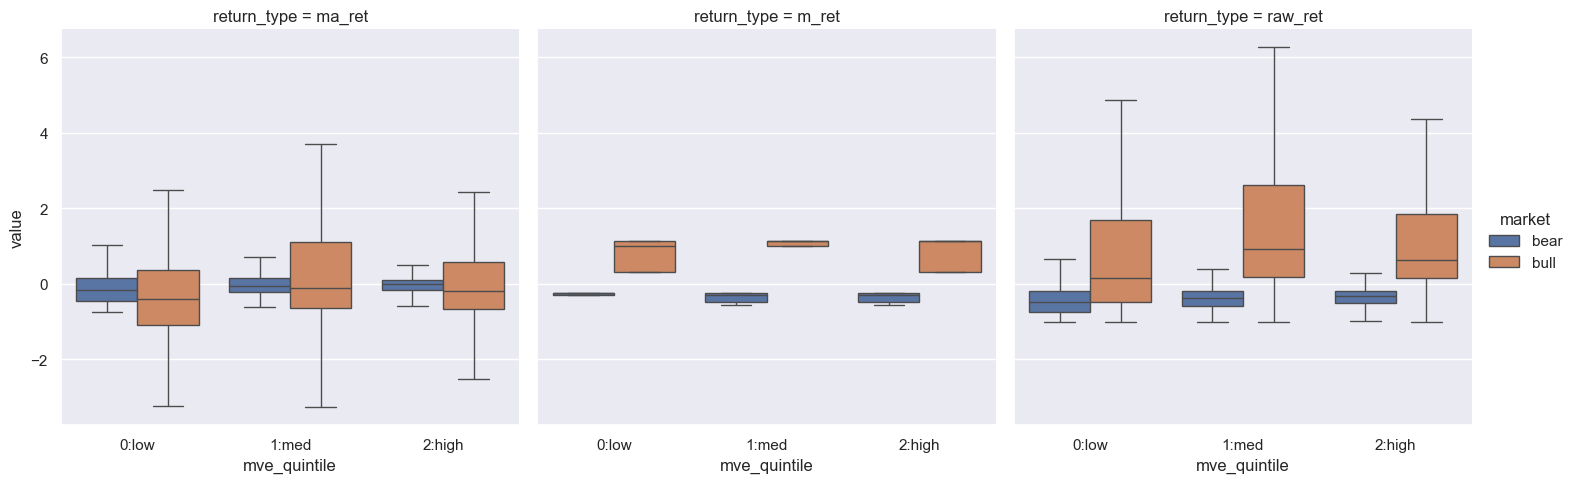

In [15]:
import seaborn as sns
sns.set_theme(style="darkgrid")
import matplotlib.pyplot as plt
# outlier removal for plotting
#res3 = res2[np.abs(stats.zscore(res2.value)) < 2]
sns.set(rc={'figure.figsize':(8.27, 5)})

p = sns.catplot(
    res2.sort_values(by=['mve_quintile']), y="value", hue='market', x='mve_quintile',kind="box",
    col='return_type',
    showfliers = False,
)
plt.show()


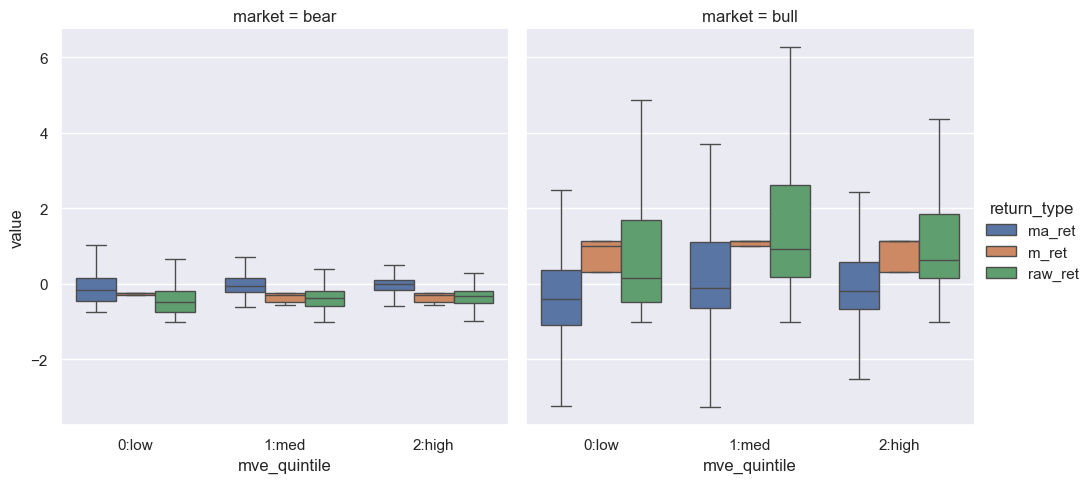

In [17]:
import seaborn as sns
sns.set_theme(style="darkgrid")
import matplotlib.pyplot as plt
# outlier removal for plotting
#res3 = res2[np.abs(stats.zscore(res2.value)) < 2]
sns.set(rc={'figure.figsize':(8.27, 5)})

p = sns.catplot(
    res2.sort_values(by=['mve_quintile']), y="value", hue='return_type', x='mve_quintile',kind="box",
    log_scale=False,
    showfliers = False,
col='market'
)
plt.show()


In [ ]:
def pos_pct(x):
    return (x > 0).mean()
caption = "One-Year Market-Adjusted Buy-and-Hold Returns to a Value Investment Strategy Based on Fundamental Signals by Size Partition"
func_lst = [np.mean,
            #np.min, 
            p5, 
            p10, 
            p25, 
            np.median, 
            p75, 
            p90, 
            #np.max, 
            pos_pct, 
            ES, 
            MS]
display(
    pd.pivot_table(
    data=res2, 
    index=['return_type','pscore',], 
    columns=['market'], 
    aggfunc=func_lst, 
    values='value',
#         margins=True
    )
    .style
    .set_caption(caption)
    .set_table_styles(styles).format('{:.2f}')
)

In [ ]:
def pos_pct(x):
    return (x > 0).mean()
caption = "One-Year Market-Adjusted Buy-and-Hold Returns to a Value Investment Strategy Based on Fundamental Signals by Size Partition"
func_lst = [np.mean,
            #np.min, 
            p5, 
            p10, 
            p25, 
            np.median, 
            p75, 
            p90, 
            #np.max, 
            pos_pct, 
            ES, 
            MS]
display(
    pd.pivot_table(
    data=res2, 
    index=['return_type','pscore_group',], 
    columns=['market'], 
    aggfunc=func_lst, 
    values='value',
#         margins=True
    )
    .style
    .set_caption(caption)
    .set_table_styles(styles).format('{:.2f}')
)